In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [99]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv")

In [100]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [101]:
df = df.drop(['id','Unnamed: 32'],axis = 1)

In [102]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [103]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [104]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [105]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

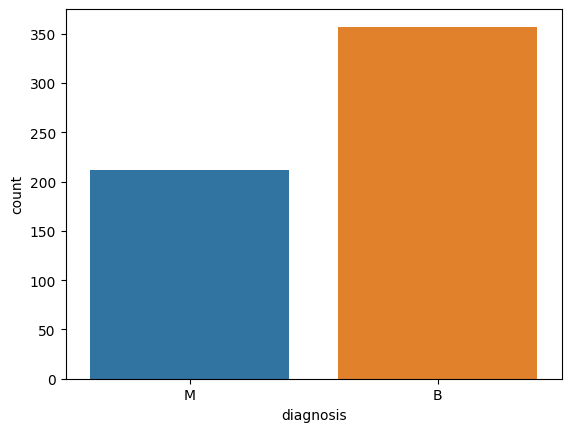

In [106]:
sns.countplot(data = df, x = 'diagnosis')

In [107]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['diagnosis'] = encoder = encoder.fit_transform(df[['diagnosis']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [109]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [110]:
X = df.drop('diagnosis', axis = 1)

In [111]:
y = df['diagnosis'].values

In [112]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [114]:
X

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [116]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [117]:
from torch.utils.data import Dataset, DataLoader

In [118]:
class TabularData(Dataset):
  def __init__(self, x, y):
    super().__init__()
    self.x = torch.from_numpy(x).type(torch.float32)
    self.y = torch.from_numpy(y).type(torch.float32)
  def __len__(self):
    return len(self.x)
  def __getitem__(self, id):
    return self.x[id], self.y[id]

In [119]:
train = TabularData(X_train,y_train)

In [120]:
len(train)

455

In [121]:
train[0]

(tensor([0.0969, 0.2577, 0.1037, 0.0454, 0.4872, 0.3740, 0.7334, 0.2174, 0.5308,
         0.6424, 0.0782, 0.1843, 0.0531, 0.0203, 0.2664, 0.6294, 0.7672, 0.6293,
         0.4797, 0.2993, 0.0847, 0.2833, 0.0752, 0.0343, 0.5087, 0.3970, 1.0000,
         0.6014, 0.5249, 0.4097]),
 tensor(0.))

In [122]:
test = TabularData(X_test, y_test)

In [123]:
len(test)

114

In [124]:
test[0]

(tensor([0.2598, 0.3006, 0.2578, 0.1435, 0.4245, 0.2651, 0.1876, 0.1899, 0.4369,
         0.2900, 0.1031, 0.1511, 0.0820, 0.0439, 0.1781, 0.1266, 0.0682, 0.1964,
         0.1398, 0.0930, 0.2504, 0.3364, 0.2273, 0.1211, 0.4717, 0.2042, 0.2133,
         0.3488, 0.2856, 0.2129]),
 tensor(0.))

In [125]:
train_loader = DataLoader(train,batch_size = 8, shuffle = True)

In [126]:
class Binclr(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = torch.nn.Linear(in_features = 30, out_features = 32)
    self.layer2 = torch.nn.Linear(in_features = 32, out_features = 16)
    self.layer3 = torch.nn.Linear(in_features = 16, out_features = 1)
    self.relu = torch.nn.ReLU()
  def forward(self, x: torch.Tensor):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [127]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [128]:
device

'cpu'

In [129]:
model = Binclr().to(device)

In [130]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.1584,  0.0260, -0.0030,  0.0743, -0.0113, -0.1043, -0.0310, -0.1533,
                        0.0694,  0.0551, -0.1736, -0.1056, -0.0337,  0.1674, -0.1024, -0.0972,
                       -0.0639, -0.1491, -0.1703, -0.0535, -0.0747, -0.0427, -0.1215,  0.0431,
                        0.0005,  0.0099,  0.0072,  0.0559,  0.0435, -0.0220],
                      [-0.1140,  0.1818, -0.1448,  0.0540,  0.1131,  0.0147,  0.1716, -0.1427,
                        0.0511,  0.1452, -0.0742,  0.0816,  0.0255,  0.0368,  0.0031,  0.1774,
                       -0.1560,  0.1727, -0.1815,  0.0434,  0.1349,  0.1238, -0.1032,  0.1339,
                        0.0553,  0.0926,  0.0011,  0.0258, -0.1056,  0.0603],
                      [-0.1773, -0.0676,  0.0372,  0.1306,  0.1740, -0.1678,  0.0880, -0.0797,
                       -0.0233,  0.1029,  0.1256, -0.1496, -0.0329,  0.0405,  0.0420,  0.0032,
                        0.1602,  0.0580,  0.1465,  0.

In [131]:
(torch.sigmoid(model(next(iter(train_loader))[0].type(torch.float32))) >= 0.5).type(torch.int)

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]], dtype=torch.int32)

In [132]:
loss = torch.nn.BCELoss()
optim = torch.optim.Adam(params = model.parameters(), lr = 0.01)

In [133]:
epochs = 15
for epoch in range(epochs):
  temp_loss = []
  for i,(features, target) in enumerate(train_loader):
    model.train()
    y_pred = model(features)
    y_pred = torch.sigmoid(y_pred)
    loss_fn = loss(y_pred.squeeze(), target)
    temp_loss.append(loss_fn.item())
    optim.zero_grad()
    loss_fn.backward()
    optim.step()
  print(f"Epoch {epoch} | Loss: {sum(temp_loss)/len(temp_loss)}")

Epoch 0 | Loss: 0.4442191791900417
Epoch 1 | Loss: 0.17606201617602715
Epoch 2 | Loss: 0.12338433924474214
Epoch 3 | Loss: 0.11739464221816313
Epoch 4 | Loss: 0.11308396965869817
Epoch 5 | Loss: 0.09740689588024427
Epoch 6 | Loss: 0.08591895613394547
Epoch 7 | Loss: 0.07572841490394223
Epoch 8 | Loss: 0.10760028793460183
Epoch 9 | Loss: 0.10341689951325718
Epoch 10 | Loss: 0.06996261386053734
Epoch 11 | Loss: 0.07163412712326502
Epoch 12 | Loss: 0.06323114961228464
Epoch 13 | Loss: 0.08225960082072242
Epoch 14 | Loss: 0.0645925172710824


In [134]:
y_pred = torch.sigmoid(model(torch.from_numpy(X_test).to(torch.float32))).detach().numpy()

In [135]:
y_pred

array([[3.4003159e-01],
       [9.9992621e-01],
       [9.9879956e-01],
       [1.8577540e-03],
       [8.8822801e-04],
       [1.0000000e+00],
       [9.9999976e-01],
       [9.9518716e-01],
       [8.6209911e-01],
       [4.5376304e-03],
       [6.1966710e-02],
       [9.9679822e-01],
       [1.0462983e-02],
       [9.9348629e-01],
       [6.7858752e-03],
       [9.9973625e-01],
       [6.5829572e-03],
       [4.4204123e-04],
       [7.2905976e-05],
       [9.9998915e-01],
       [2.3670384e-01],
       [1.8755309e-02],
       [9.9999976e-01],
       [1.0517106e-03],
       [7.5678737e-03],
       [3.8028245e-03],
       [6.9617946e-03],
       [1.8920576e-02],
       [5.6586955e-03],
       [9.9998307e-01],
       [3.0375782e-03],
       [1.8039752e-03],
       [8.2226787e-03],
       [6.7760223e-03],
       [1.1922483e-03],
       [1.2928314e-02],
       [9.8475778e-01],
       [1.3518318e-02],
       [9.9975687e-01],
       [6.7372933e-02],
       [1.1270945e-03],
       [9.994441

In [136]:
y_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [137]:
y_pred = (y_pred >= 0.5).astype(int).squeeze()

In [138]:
len(y_pred)

114

In [139]:
y_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [140]:
from sklearn.metrics import accuracy_score, confusion_matrix
score = accuracy_score(y_test, y_pred)

In [141]:
score*100

96.49122807017544

<Axes: >

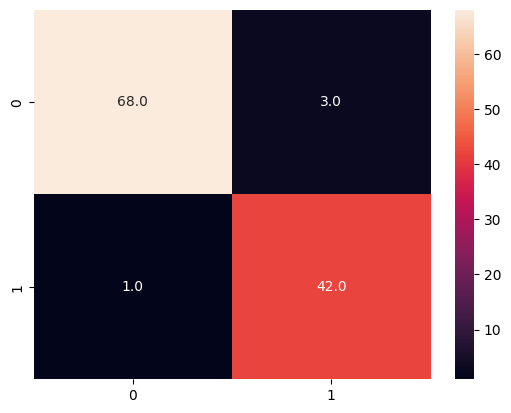

In [142]:
sns.heatmap(confusion_matrix(y_test, y_pred), fmt = '.1f', annot = True)